In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Quantization_Log.csv')
df.head()

,model,dataset,batch_size,original_top1,quantized_top1,original_top5,quantized_top5,bits,mlp_scalar,cnn_scalar,...,original_sparsity,quantized_sparsity,retain_rate,fusion,seed,similarity,num_classes,classes,max_KL_dist,avg_KL_dist
0,resnet_20,CIFAR100,256,0.6500,0.615000,0.840000,0.825000,4,1.16,1.16,...,0.0,0.2336,0.25,False,0,0,2,"['lizard', 'wardrobe']",51.332628,51.332628
1,resnet_20,CIFAR100,256,0.4500,0.450000,0.715000,0.735000,4,1.16,1.16,...,0.0,0.2402,0.25,False,0,1,2,"['lizard', 'snail']",0.118774,0.118774
2,resnet_20,CIFAR100,256,0.7300,0.723333,0.893333,0.903333,4,1.16,1.16,...,0.0,0.2347,0.25,False,0,0,3,"['lizard', 'orange', 'wardrobe']",144.827023,73.008978
3,resnet_20,CIFAR100,256,0.5300,0.546667,0.763333,0.790000,4,1.16,1.16,...,0.0,0.2340,0.25,False,0,1,3,"['mushroom', 'lizard', 'snail']",0.253842,0.154822
4,resnet_20,CIFAR100,256,0.7325,0.712500,0.910000,0.900000,4,1.16,1.16,...,0.0,0.2369,0.25,False,0,0,4,"['pickup_truck', 'lizard', 'orange', 'wardrobe']",192.253176,78.245831


In [31]:
df.describe()

,batch_size,original_top1,quantized_top1,original_top5,quantized_top5,bits,mlp_scalar,cnn_scalar,mlp_percentile,cnn_percentile,regularizer,lamb,original_sparsity,quantized_sparsity,retain_rate,seed,similarity,num_classes,max_KL_dist,avg_KL_dist
count,38.0,38.000000,38.000000,38.000000,38.000000,38.0,3.800000e+01,3.800000e+01,38.0,38.0,0.0,3.800000e+01,38.0,38.000000,38.00,38.0,38.000000,38.000000,38.000000,38.000000
mean,256.0,0.632075,0.625430,0.864964,0.860670,4.0,1.160000e+00,1.160000e+00,1.0,1.0,NaN,1.000000e-01,0.0,0.235513,0.25,0.0,0.500000,11.000000,91.915996,31.955196
std,0.0,0.093656,0.088706,0.065526,0.063100,0.0,9.001008e-16,9.001008e-16,0.0,0.0,NaN,4.219223e-17,0.0,0.002961,0.00,0.0,0.506712,5.550749,94.579222,32.481530
min,256.0,0.450000,0.450000,0.715000,0.735000,4.0,1.160000e+00,1.160000e+00,1.0,1.0,NaN,1.000000e-01,0.0,0.230800,0.25,0.0,0.000000,2.000000,0.118774,0.118774
25%,256.0,0.546687,0.546354,0.810833,0.804500,4.0,1.160000e+00,1.160000e+00,1.0,1.0,NaN,1.000000e-01,0.0,0.233450,0.25,0.0,0.000000,6.250000,0.996912,0.398995
50%,256.0,0.612857,0.598571,0.839643,0.830714,4.0,1.160000e+00,1.160000e+00,1.0,1.0,NaN,1.000000e-01,0.0,0.234900,0.25,0.0,0.500000,11.000000,27.440758,26.020826
75%,256.0,0.725864,0.710625,0.932295,0.925971,4.0,1.160000e+00,1.160000e+00,1.0,1.0,NaN,1.000000e-01,0.0,0.237850,0.25,0.0,1.000000,15.750000,192.253176,62.879857
max,256.0,0.748333,0.747692,0.940000,0.937143,4.0,1.160000e+00,1.160000e+00,1.0,1.0,NaN,1.000000e-01,0.0,0.241500,0.25,0.0,1.000000,20.000000,192.253176,78.245831


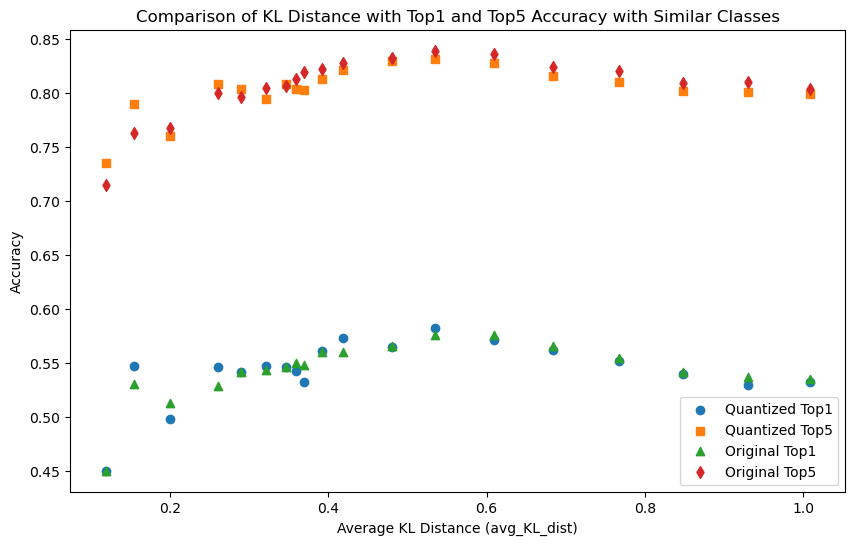

In [23]:
# Create a figure and axis
sim_df = df[df['similarity']==1]
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(sim_df['avg_KL_dist'], sim_df['quantized_top1'], label='Quantized Top1', marker='o')
plt.scatter(sim_df['avg_KL_dist'], sim_df['quantized_top5'], label='Quantized Top5', marker='s')
plt.scatter(sim_df['avg_KL_dist'], sim_df['original_top1'], label='Original Top1', marker='^')
plt.scatter(sim_df['avg_KL_dist'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Average KL Distance (avg_KL_dist)')
plt.ylabel('Accuracy')
plt.title('Comparison of KL Distance with Top1 and Top5 Accuracy with Similar Classes')

# Add a legend
plt.legend()

# Show the plot
plt.show()

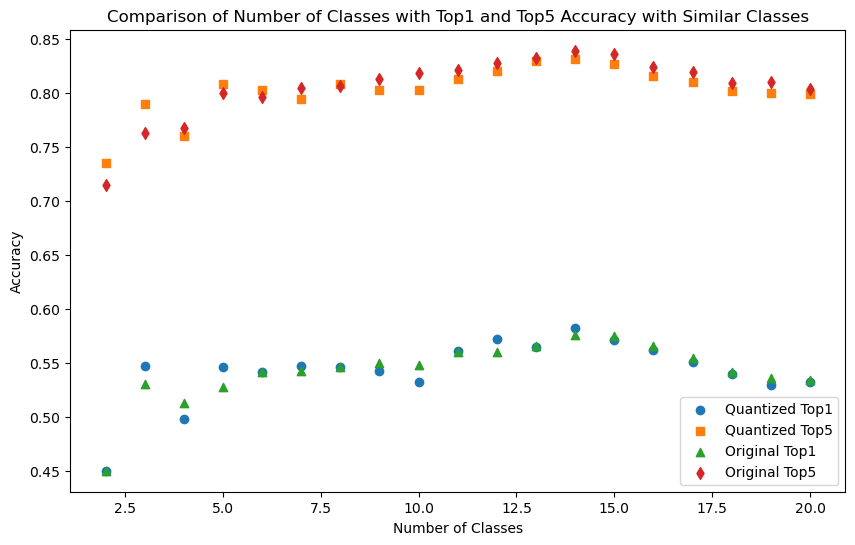

In [24]:
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(sim_df['num_classes'], sim_df['quantized_top1'], label='Quantized Top1', marker='o')
plt.scatter(sim_df['num_classes'], sim_df['quantized_top5'], label='Quantized Top5', marker='s')
plt.scatter(sim_df['num_classes'], sim_df['original_top1'], label='Original Top1', marker='^')
plt.scatter(sim_df['num_classes'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Number of Classes')
plt.ylabel('Accuracy')
plt.title('Comparison of Number of Classes with Top1 and Top5 Accuracy with Similar Classes')

# Add a legend
plt.legend()

# Show the plot
plt.show()

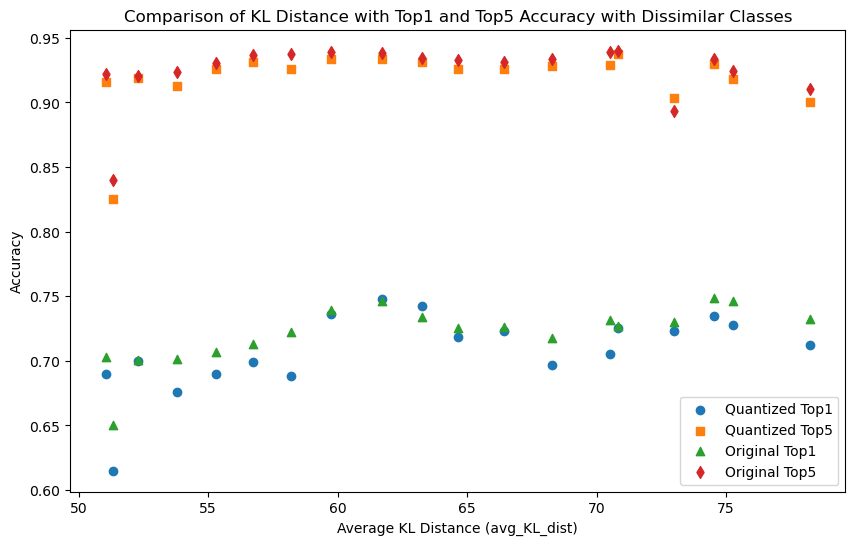

In [25]:
# Create a figure and axis
sim_df = df[df['similarity']==0]
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(sim_df['avg_KL_dist'], sim_df['quantized_top1'], label='Quantized Top1', marker='o')
plt.scatter(sim_df['avg_KL_dist'], sim_df['quantized_top5'], label='Quantized Top5', marker='s')
plt.scatter(sim_df['avg_KL_dist'], sim_df['original_top1'], label='Original Top1', marker='^')
plt.scatter(sim_df['avg_KL_dist'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Average KL Distance (avg_KL_dist)')
plt.ylabel('Accuracy')
plt.title('Comparison of KL Distance with Top1 and Top5 Accuracy with Dissimilar Classes')

# Add a legend
plt.legend()

# Show the plot
plt.show()

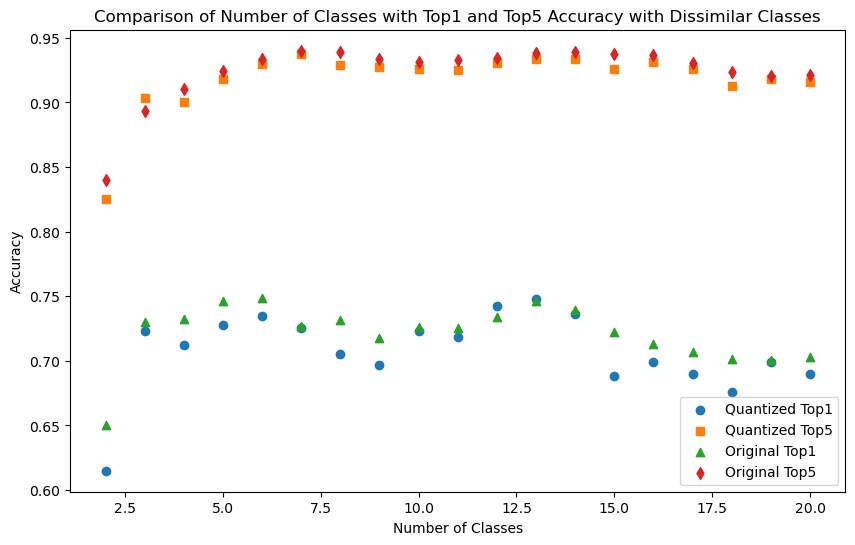

In [27]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(sim_df['num_classes'], sim_df['quantized_top1'], label='Quantized Top1', marker='o')
plt.scatter(sim_df['num_classes'], sim_df['quantized_top5'], label='Quantized Top5', marker='s')
plt.scatter(sim_df['num_classes'], sim_df['original_top1'], label='Original Top1', marker='^')
plt.scatter(sim_df['num_classes'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Number of Classes')
plt.ylabel('Accuracy')
plt.title('Comparison of Number of Classes with Top1 and Top5 Accuracy with Dissimilar Classes')

# Add a legend
plt.legend()

# Show the plot
plt.show()

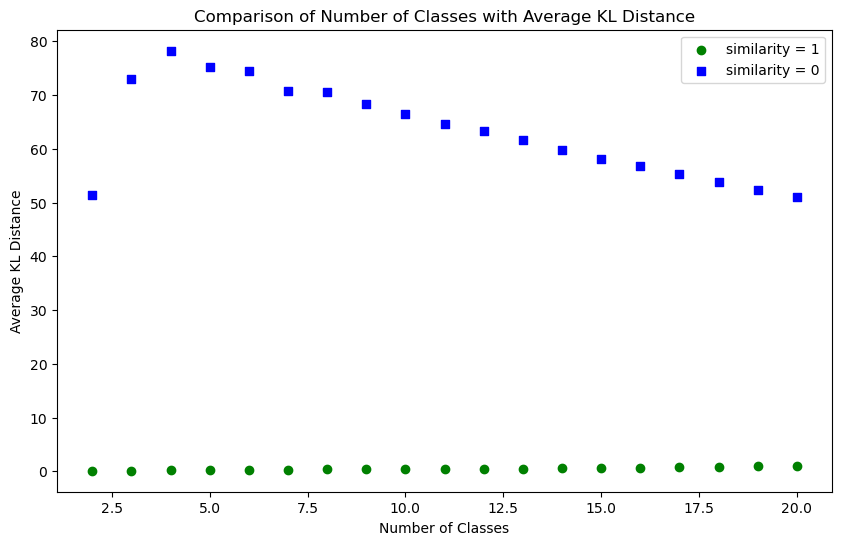

In [28]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot points where sim == 1 in green
plt.scatter(df[df['similarity'] == 1]['num_classes'], df[df['similarity'] == 1]['avg_KL_dist'], 
            label='similarity = 1', color='g', marker='o')

# Plot points where sim == 0 in another color (optional)
plt.scatter(df[df['similarity'] == 0]['num_classes'], df[df['similarity'] == 0]['avg_KL_dist'], 
            label='similarity = 0', color='b', marker='s')

# Add labels and title
plt.xlabel('Number of Classes')
plt.ylabel('Average KL Distance')
plt.title('Comparison of Number of Classes with Average KL Distance')

# Add a legend
plt.legend()

# Show the plot
plt.show()

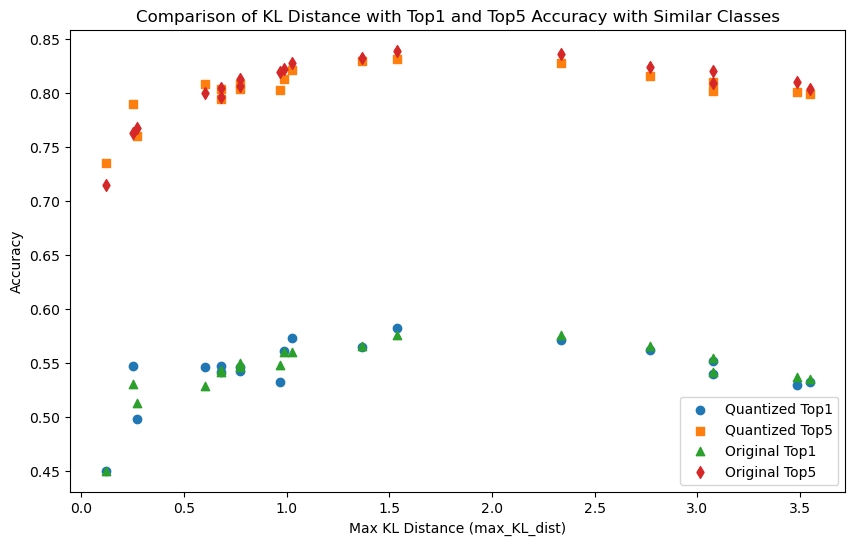

In [37]:
# Create a figure and axis
sim_df = df[df['similarity']==1]
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(sim_df['max_KL_dist'], sim_df['quantized_top1'], label='Quantized Top1', marker='o')
plt.scatter(sim_df['max_KL_dist'], sim_df['quantized_top5'], label='Quantized Top5', marker='s')
plt.scatter(sim_df['max_KL_dist'], sim_df['original_top1'], label='Original Top1', marker='^')
plt.scatter(sim_df['max_KL_dist'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Max KL Distance (max_KL_dist)')
plt.ylabel('Accuracy')
plt.title('Comparison of KL Distance with Top1 and Top5 Accuracy with Similar Classes')

# Add a legend
plt.legend()

# Show the plot
plt.show()

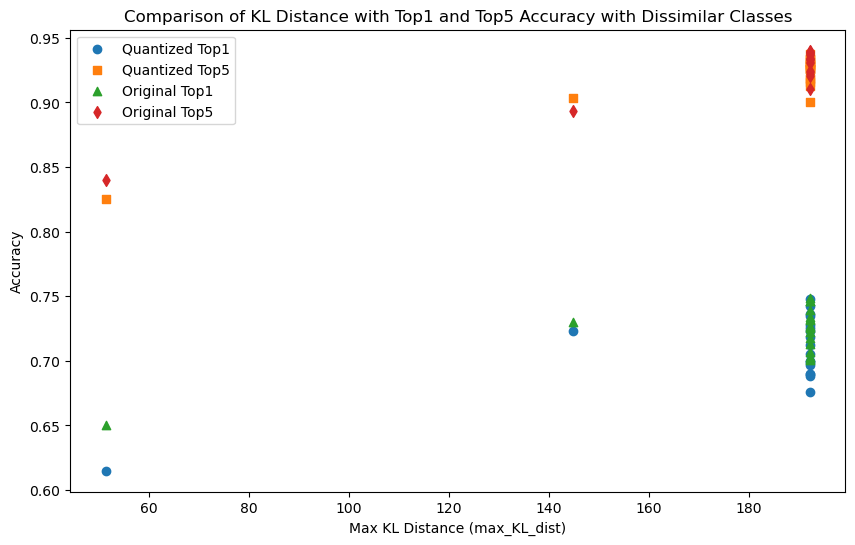

In [38]:
# Create a figure and axis
sim_df = df[df['similarity']==0]
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(sim_df['max_KL_dist'], sim_df['quantized_top1'], label='Quantized Top1', marker='o')
plt.scatter(sim_df['max_KL_dist'], sim_df['quantized_top5'], label='Quantized Top5', marker='s')
plt.scatter(sim_df['max_KL_dist'], sim_df['original_top1'], label='Original Top1', marker='^')
plt.scatter(sim_df['max_KL_dist'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Max KL Distance (max_KL_dist)')
plt.ylabel('Accuracy')
plt.title('Comparison of KL Distance with Top1 and Top5 Accuracy with Dissimilar Classes')

# Add a legend
plt.legend()

# Show the plot
plt.show()